<a href="https://colab.research.google.com/github/marcorrea1/AAI2026/blob/main/Part_3_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

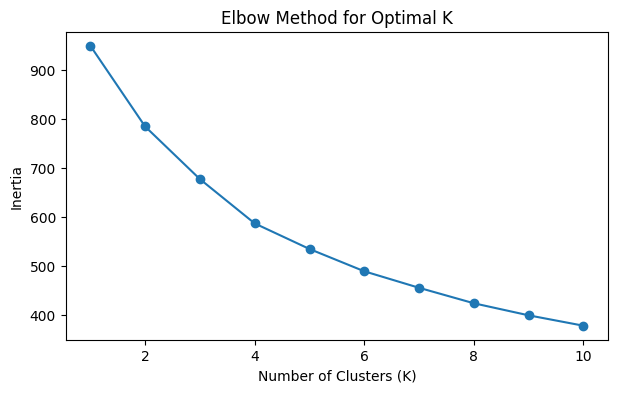


Cluster Characteristics:
         annual_income  purchase_frequency    age  spending_score
cluster                                                          
0             90896.75               17.29  35.67           26.17
1             65541.50               12.00  57.43           70.55
2             53313.68               27.86  29.23           72.34
3             63827.02               39.52  50.52           39.15

Cluster Strategies:

Cluster 0 Strategy:
Value seekers: Provide bulk discounts and multi-buy promotions.

Cluster 1 Strategy:
Value seekers: Provide bulk discounts and multi-buy promotions.

Cluster 2 Strategy:
Frequent shoppers: Offer loyalty rewards or subscription plans.

Cluster 3 Strategy:
Frequent shoppers: Offer loyalty rewards or subscription plans.


In [10]:
# Part 3: Customer Segmentation using K-Means
# Data source: customer_segmentation_data.csv
# Used Chatgbt SJSU to generate file for this assignment

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the customer dataset
df = pd.read_csv(
    "/content/drive/MyDrive/Coding Exercise - ML Basics/customer_segmentation_data.csv"
)

# Define numerical and categorical features
numeric_features = [
    "annual_income",
    "purchase_frequency",
    "age",
    "spending_score"
]
categorical_features = ["region"]

# Scale numerical features and encode categorical feature
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Combine features
X = df[numeric_features + categorical_features]

# -----------------------
# Elbow Method
# -----------------------
K_range = range(1, 11)
inertia = []

for k in K_range:
    model = Pipeline([
        ("preprocess", preprocessor),
        ("kmeans", KMeans(n_clusters=k, random_state=42, n_init=10))
    ])
    model.fit(X)
    inertia.append(model.named_steps["kmeans"].inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# -----------------------
# Final Model with K = 4
# -----------------------
final_model = Pipeline([
    ("preprocess", preprocessor),
    ("kmeans", KMeans(n_clusters=4, random_state=42, n_init=10))
])

df["cluster"] = final_model.fit_predict(X)

# -----------------------
# Cluster Characteristics
# -----------------------
cluster_summary = (
    df.groupby("cluster")[numeric_features]
    .mean()
    .round(2)
)

print("\nCluster Characteristics:")
print(cluster_summary)

# -----------------------
# Business Strategies
# -----------------------
print("\nCluster Strategies:")

for cluster_id, row in cluster_summary.iterrows():
    spend = row["annual_income"]
    freq = row["purchase_frequency"]

    if spend > 70000 and freq < 12:
        strategy = "Premium buyers: Promote high-end products and exclusive offers."
    elif freq >= 18:
        strategy = "Frequent shoppers: Offer loyalty rewards or subscription plans."
    elif freq < 10:
        strategy = "Occasional buyers: Send re-engagement campaigns and comeback discounts."
    else:
        strategy = "Value seekers: Provide bulk discounts and multi-buy promotions."

    print(f"\nCluster {cluster_id} Strategy:")
    print(strategy)


Part 3: Customer Segmentation


The Elbow Method shows that 4 clusters is a good choice, as it improves customer grouping.


Each cluster above represents a different type of customer
- Cluster 0: High-income customers who purchase moderately but spend carefully. Best approach with value-focused or limited offers.
- Cluster 1: Older customers who spend more per visit but purchase less often. Personalized promotions can encourage more frequent purchases.
- Cluster 2: Younger customers who shop often and enjoy spending. Offering loyalty rewards and subscriptions will work for this group.
- Cluster 3: Customers who purchase very frequently and spend moderately. Retention programs and convenience-based offers can help keep them engaged.
